In [1]:
from collections import defaultdict
from metaflow import Flow, Run
import pandas as pd

In [7]:
flow = Flow('TreeCandidates')
runs = list(flow.runs('promising_model'))
runs

[Run('TreeCandidates/81222'),
 Run('TreeCandidates/81221'),
 Run('TreeCandidates/81214')]

In [8]:
index = []
data = defaultdict(list)
for run in runs:
    index.append(run.id)
    for param, val in run['train'].task['params'].data.items():
        data[param].append(val)
    data['accuracy'].append(run['eval'].task['accuracy'].data)
df = pd.DataFrame(data, index=index)
df

,max_leaf_nodes,max_depth,max_features,random_state,accuracy
81222,None,5,log2,5,0.854875
81221,None,5,log2,0,0.818594
81214,None,4,sqrt,0,0.843537


<AxesSubplot:title={'center':'accuracy'}>

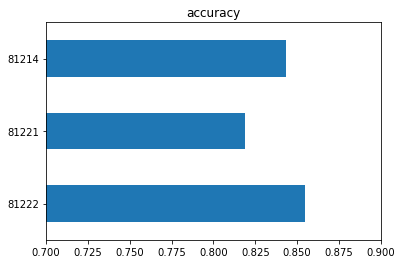

In [9]:
df['accuracy'].plot(kind='barh', xlim=[0.7, 0.9], title='accuracy')

In [6]:
Run('TreeCandidates/81217').remove_tag('promising_model')